## Importing libraries 

In [51]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
import time
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

## Importing the Dataset

In [5]:
# List of subfolders
subfolders = ["beyza", "zeynep", "ezgi"]

# Set the path to the root directory
root_path = r"C:\Users\Beyza\Desktop\project"

images = []
labels = []

valid_extensions = {".jpg", ".jpeg", ".png"}

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)

    for folder_name in os.listdir(subfolder_path):
        folder_path = os.path.join(subfolder_path, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if any(file_name.lower().endswith(ext) for ext in valid_extensions):
                    image_path = os.path.join(folder_path, file_name)
                    # Extract class information from the file name (before the first '_')
                    label = file_name.split('_')[0]
                    # Extract only the part before the decimal point
                    label = label.split('.')[0]
                    img = cv2.imread(image_path)
                    if img is None:
                        print(f"Failed to load image: {image_path}")
                    else:
                        img = cv2.resize(img, (64, 64))
                        images.append(img)
                        labels.append(label)

## Preprocessing

In [8]:
images = np.array(images)
labels = np.array(labels)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

images = images / 255.0

## Splitting the Dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

## Fitting the Model

In [10]:
# Define the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
# Define the optimizer 
custom_learning_rate = 0.001
custom_optimizer = Adam(learning_rate=custom_learning_rate)

In [12]:
# Create an image data generator
datagen = ImageDataGenerator(rescale=1./255)

In [13]:
# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Create a generator for training data
train_generator = datagen.flow(X_train, y_train, batch_size=32)

# Create a generator for validation data
validation_generator = datagen.flow(X_test, y_test, batch_size=32)

In [15]:
# Record the start time before compilation
start_time = time.time()

In [16]:
# Train the model
history_2 = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 31s 103ms/step - accuracy: 0.0220 - loss: 4.0089 - val_accuracy: 0.0824 - val_loss: 3.6881
Epoch 2/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 25s 96ms/step - accuracy: 0.1081 - loss: 3.5056 - val_accuracy: 0.1540 - val_loss: 3.2074
Epoch 3/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - accuracy: 0.1841 - loss: 3.0720 - val_accuracy: 0.1799 - val_loss: 3.1069
Epoch 4/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 25s 95ms/step - accuracy: 0.2473 - loss: 2.8156 - val_accuracy: 0.2186 - val_loss: 2.9828
Epoch 5/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 25s 96ms/step - accuracy: 0.2997 - loss: 2.6044 - val_accuracy: 0.2958 - val_loss: 2.5711
Epoch 6/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 25s 96ms/step - accuracy: 0.3713 - loss: 2.2830 - val_accuracy: 0.1998 - val_loss: 3.1851
Epoch 7/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 25s 96ms/step - accuracy: 0.3820 - loss: 2.2393 - val_accuracy: 0.1635 - val_loss: 4.6170
Epoch 8/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 26s 97ms/step - accuracy: 0.4137 - loss: 2.1688 

In [17]:
# Record the end time after compilation
end_time = time.time()

# Calculate and print the compilation time
compilation_time = end_time - start_time
print(f"Model compilation time: {compilation_time} seconds")

Model compilation time: 1065.5952904224396 seconds


## Results

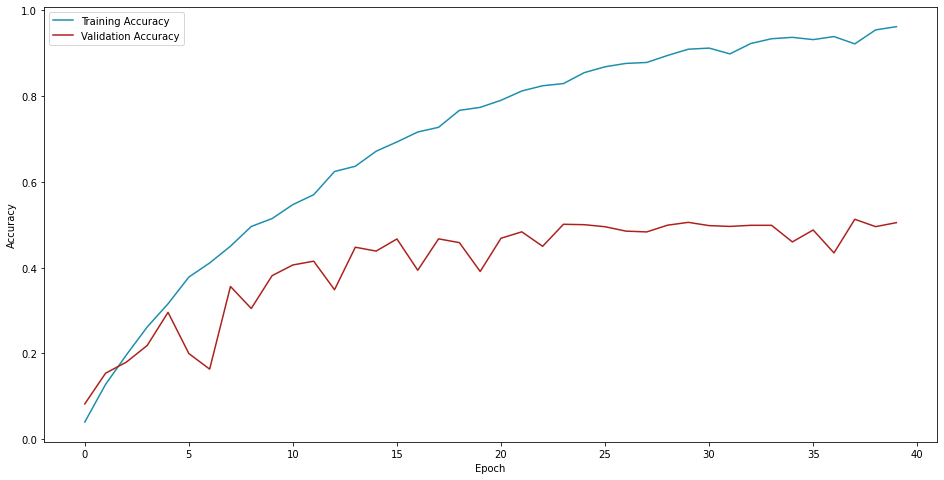

In [57]:
# Plot accuracy and validation accuracy graphs
plt.figure(figsize=(16, 8))
plt.plot(history_2.history['accuracy'], label='Training Accuracy',color="#1D8FAD")
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy',color="#AD211D")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy * 100:.2f}%')

132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4925 - loss: 3.1101
Test loss: 3.0068, Test accuracy: 50.49%


## Plotting 10 True Samples 

132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


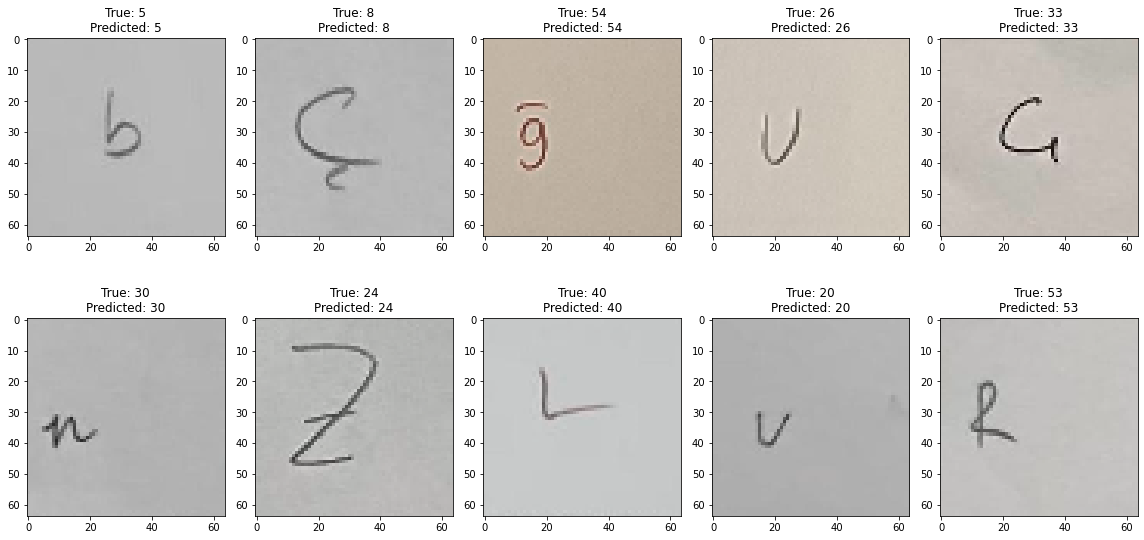

In [67]:
# Use the trained model to predict classes on the test set
predictions = model.predict(X_test)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Decode the encoded labels back to the original labels
decoded_predicted_labels = label_encoder.inverse_transform(predicted_labels)
decoded_true_labels = label_encoder.inverse_transform(y_test)

# Display 10 true predicted images in a subplot 
num_wrong_images_to_display = 10
num_columns = 5
num_rows = 2
count = 0

plt.figure(figsize=(16, 8))  

for i in range(len(X_test)):
    if decoded_true_labels[i] == decoded_predicted_labels[i]:
        plt.subplot(num_rows, num_columns, count + 1)
        plt.imshow(X_test[i])
        plt.title(f"True: {decoded_true_labels[i]}\nPredicted: {decoded_predicted_labels[i]}")
        count += 1

        if count == num_wrong_images_to_display:
            break

plt.tight_layout()
plt.show()


## Plotting 10 False Samples 

132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


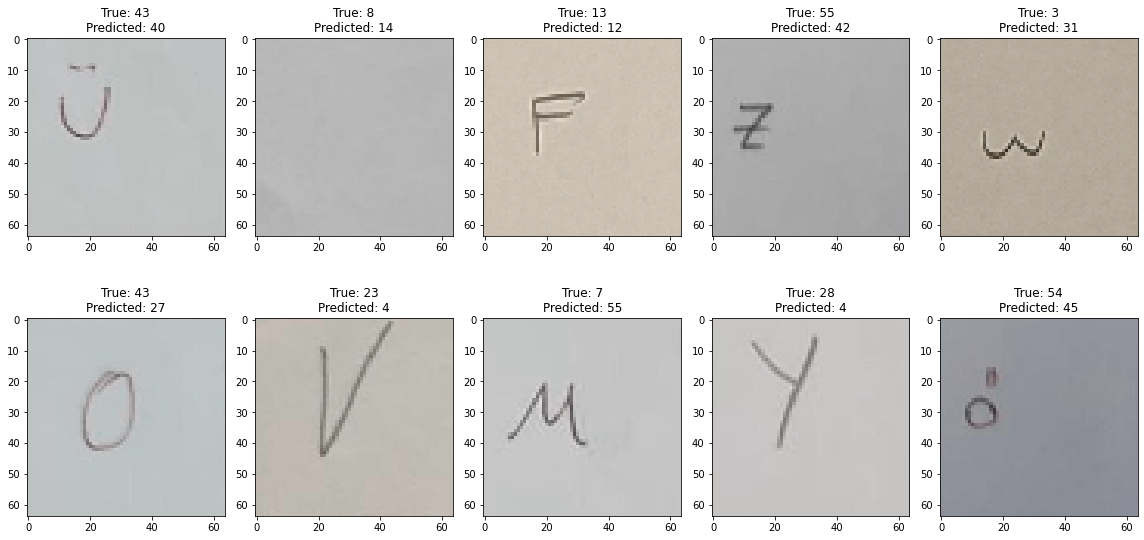

In [63]:
# Use the trained model to predict classes on the test set
predictions = model.predict(X_test)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Decode the encoded labels back to the original labels
decoded_predicted_labels = label_encoder.inverse_transform(predicted_labels)
decoded_true_labels = label_encoder.inverse_transform(y_test)

# Display 10 wrong predicted images in a subplot
num_wrong_images_to_display = 10
num_columns = 5
num_rows = 2
count = 0

plt.figure(figsize=(16, 8))  

for i in range(len(X_test)):
    if decoded_true_labels[i] != decoded_predicted_labels[i]:
        plt.subplot(num_rows, num_columns, count + 1)
        plt.imshow(X_test[i])
        plt.title(f"True: {decoded_true_labels[i]}\nPredicted: {decoded_predicted_labels[i]}")
        count += 1

        if count == num_wrong_images_to_display:
            break

plt.tight_layout()
plt.show()


## Statistical Tests

132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


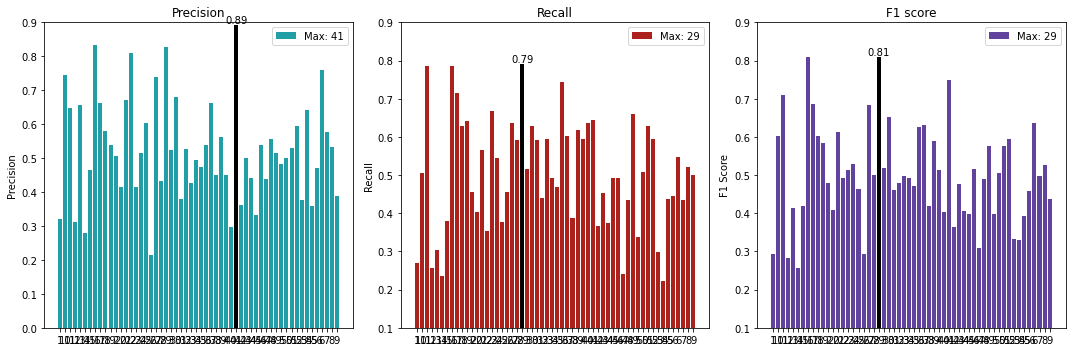

In [91]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Use the trained model to predict classes on the test set
predictions = model.predict(X_test)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Decode the encoded labels back to the original labels
decoded_true_labels = label_encoder.inverse_transform(y_test)

# Obtain confusion matrix
conf_matrix = confusion_matrix(decoded_true_labels, decoded_predicted_labels, labels=label_encoder.classes_)

# Calculate precision, recall, and F1 score for each class
precision = precision_score(decoded_true_labels, decoded_predicted_labels, average=None)
recall = recall_score(decoded_true_labels, decoded_predicted_labels, average=None)
f1 = f1_score(decoded_true_labels, decoded_predicted_labels, average=None)

# Colors for the bars
precision_color = '#229EA6'
recall_color = '#AD211D'
f1_color = '#61439D'
highlight_color = 'black'

# Find the class with the highest precision, recall, and F1 score
max_precision_class = label_encoder.classes_[np.argmax(precision)]
max_recall_class = label_encoder.classes_[np.argmax(recall)]
max_f1_class = label_encoder.classes_[np.argmax(f1)]

# Plot precision, recall, and F1 score for each class in subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot precision
max_precision_index = np.argmax(precision)
axes[0].bar(label_encoder.classes_, precision, color=precision_color, label=f'Max: {max_precision_class}')
axes[0].bar(label_encoder.classes_[max_precision_index], precision[max_precision_index], color=highlight_color)
axes[0].text(max_precision_index, precision[max_precision_index], f'{precision[max_precision_index]:.2f}', ha='center', va='bottom', color=highlight_color)
axes[0].set_title('Precision')
axes[0].set_ylabel('Precision')
axes[0].set_ylim(0., 0.9)
axes[0].legend()

# Plot recall
max_recall_index = np.argmax(recall)
axes[1].bar(label_encoder.classes_, recall, color=recall_color, label=f'Max: {max_recall_class}')
axes[1].bar(label_encoder.classes_[max_recall_index], recall[max_recall_index], color=highlight_color)
axes[1].text(max_recall_index, recall[max_recall_index], f'{recall[max_recall_index]:.2f}', ha='center', va='bottom', color=highlight_color)
axes[1].set_title('Recall')
axes[1].set_ylabel('Recall')
axes[1].set_ylim(0.1, 0.9)
axes[1].legend()

# Plot F1 score
max_f1_index = np.argmax(f1)
axes[2].bar(label_encoder.classes_, f1, color=f1_color, label=f'Max: {max_f1_class}')
axes[2].bar(label_encoder.classes_[max_f1_index], f1[max_f1_index], color=highlight_color)
axes[2].text(max_f1_index, f1[max_f1_index], f'{f1[max_f1_index]:.2f}', ha='center', va='bottom', color=highlight_color)
axes[2].set_title('F1 score')
axes[2].set_ylabel('F1 Score')
axes[2].set_ylim(0.1, 0.9)
axes[2].legend()

plt.tight_layout()
plt.show()
